<a href="https://colab.research.google.com/github/FredMiraglia/projeto_analise_dados/blob/main/Analise_series_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io
import scipy.stats as stats
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

pd.options.plotting.backend = 'plotly'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'
import yfinance as yf

In [2]:
cotacaes = yf.Ticker('MSFT')
# dados do perildo 1d,5d, 1mo,3mo, 6mo, 1y, 2y, 5y, 10y, index_col = Data

dados = cotacaes.history(period="1y")
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-26 00:00:00-05:00,372.96,374.89,371.47,372.62,12673100,0.00,0.00
2023-12-27 00:00:00-05:00,371.66,373.02,370.78,372.04,14905400,0.00,0.00
2023-12-28 00:00:00-05:00,373.33,374.41,372.13,373.24,14327000,0.00,0.00
2023-12-29 00:00:00-05:00,373.96,375.11,371.45,374.00,18723000,0.00,0.00
2024-01-02 00:00:00-05:00,371.83,373.86,364.78,368.85,25258600,0.00,0.00


In [3]:
dados.drop(['Dividends','Stock Splits'], axis=1, inplace=True)
dados.columns = ['Abertura','Maximo','Minimo','Fechamento','Volume']
dados.head()

,Abertura,Maximo,Minimo,Fechamento,Volume
Date,,,,,
2023-12-26 00:00:00-05:00,372.96,374.89,371.47,372.62,12673100
2023-12-27 00:00:00-05:00,371.66,373.02,370.78,372.04,14905400
2023-12-28 00:00:00-05:00,373.33,374.41,372.13,373.24,14327000
2023-12-29 00:00:00-05:00,373.96,375.11,371.45,374.00,18723000
2024-01-02 00:00:00-05:00,371.83,373.86,364.78,368.85,25258600


In [4]:
dados.head()

,Abertura,Maximo,Minimo,Fechamento,Volume
Date,,,,,
2023-12-26 00:00:00-05:00,372.96,374.89,371.47,372.62,12673100
2023-12-27 00:00:00-05:00,371.66,373.02,370.78,372.04,14905400
2023-12-28 00:00:00-05:00,373.33,374.41,372.13,373.24,14327000
2023-12-29 00:00:00-05:00,373.96,375.11,371.45,374.00,18723000
2024-01-02 00:00:00-05:00,371.83,373.86,364.78,368.85,25258600


In [5]:
dados.tail()

,Abertura,Maximo,Minimo,Fechamento,Volume
Date,,,,,
2024-12-18 00:00:00-05:00,451.32,452.65,437.02,437.39,24444500
2024-12-19 00:00:00-05:00,441.62,443.18,436.32,437.03,22963700
2024-12-20 00:00:00-05:00,433.11,443.74,428.63,436.60,64263700
2024-12-23 00:00:00-05:00,436.74,437.65,432.83,435.25,19152500
2024-12-24 00:00:00-05:00,434.65,439.60,434.19,439.33,7164500


In [6]:
dados.Date = pd.to_datetime(dados.index)
dados= dados.reset_index()

In [7]:
dados["dia"] = dados["Date"].dt.day
dados["mes"] = dados["Date"].dt.month
dados["ano"] = dados["Date"].dt.year

In [8]:
mes_s = dados[["mes","Minimo","Abertura",'Fechamento',"Maximo","Volume"]].groupby("mes").mean().reset_index()
mes_s

,mes,Minimo,Abertura,Fechamento,Maximo,Volume
0,1,383.97,387.03,387.33,390.39,25161857.14
1,2,403.85,406.86,407.18,409.58,22208815.00
2,3,411.68,415.23,415.29,418.06,21317480.00
3,4,408.92,413.61,411.78,416.16,20035350.00
4,5,412.60,415.90,416.45,419.15,18809127.27
5,6,433.42,436.00,437.55,439.57,18019494.74
6,7,440.18,445.21,444.54,448.62,20020418.18
7,8,408.79,412.86,412.20,416.18,20541772.73
8,9,420.60,424.84,424.23,427.78,18846060.00
9,10,417.02,421.12,419.75,423.57,19162847.83


In [9]:
dia_s = dados[["dia","Minimo","Abertura",'Fechamento',"Maximo","Volume"]].groupby("dia").mean().reset_index()
dia_s

,dia,Minimo,Abertura,Fechamento,Maximo,Volume
0,1,412.77,416.05,416.94,421.75,22452375.00
1,2,408.70,412.07,413.56,416.56,21166525.00
2,3,412.35,415.45,415.33,418.30,17094000.00
3,4,407.32,410.34,410.24,413.85,19025562.50
4,5,409.13,412.38,414.13,418.05,21701960.00
5,6,409.16,412.35,413.01,416.07,20330425.00
6,7,408.78,413.38,411.87,416.05,19453057.14
7,8,411.11,413.29,414.00,416.23,17520188.89
8,9,413.93,416.90,417.87,420.12,17329166.67
9,10,418.30,419.82,422.69,424.34,17405550.00


In [10]:
#fig = px.bar(data_frame=df, x="dia", y='Abertura',title='Abertura da ação', animation_frame="mes", animation_group="Volume")
#fig.show()

In [11]:
fig = px.line(data_frame=dia_s, x="dia", y='Abertura',title='Abertura da ação', markers=True)
fig.show()
#px.line(data_frame=dia_s, x="dia", y='Fechamento',title='Abertura da ação', markers=True)


In [12]:
grafico_linhas = go.Figure()
grafico_linhas.add_trace(go.Scatter(x=dia_s.dia, y=dia_s.Abertura, name='Minimo',mode='lines+markers'))
grafico_linhas.add_trace(go.Scatter(x=dia_s.dia, y=dia_s.Abertura, name='Abertura',mode='lines+markers'))
grafico_linhas.add_trace(go.Scatter(x=dia_s.dia, y=dia_s.Fechamento, name='Fechamento',mode='lines+markers'))
grafico_linhas.add_trace(go.Scatter(x=dia_s.dia, y=dia_s.Maximo, name='Maximo',mode='lines+markers'))
grafico_linhas.add_trace(go.Scatter(x=dia_s.dia, y=dia_s.Abertura, name='Volume',mode='lines+markers'))
grafico_linhas.update_layout(title='Abertura e Fechamento da ação por Dia', xaxis_title='Dia', yaxis_title='Preço')
grafico_linhas.show()


In [13]:
grafico_linhas = go.Figure()
grafico_linhas.add_trace(go.Scatter(x=mes_s.mes, y=mes_s.Abertura, name='Minimo',mode='lines+markers'))
grafico_linhas.add_trace(go.Scatter(x=mes_s.mes, y=mes_s.Abertura, name='Abertura',mode='lines+markers'))
grafico_linhas.add_trace(go.Scatter(x=mes_s.mes, y=mes_s.Fechamento, name='Fechamento',mode='lines+markers'))
grafico_linhas.add_trace(go.Scatter(x=mes_s.mes, y=mes_s.Maximo, name='Maximo',mode='lines+markers'))
grafico_linhas.add_trace(go.Scatter(x=mes_s.mes, y=mes_s.Abertura, name='Volume',mode='lines+markers'))
grafico_linhas.update_layout(title='Abertura e Fechamento da ação por Mês', xaxis_title='Dia', yaxis_title='Preço')
grafico_linhas.show()

In [14]:
grafico_bar = go.Figure()
grafico_bar.add_trace(go.Bar(x=dia_s.dia, y=dia_s.Minimo, name='Mínimo'))
grafico_bar.add_trace(go.Bar(x=dia_s.dia, y=dia_s.Abertura, name='Abertura'))
grafico_bar.add_trace(go.Bar(x=dia_s.dia, y=dia_s.Fechamento, name='Fechamento'))
grafico_bar.add_trace(go.Bar(x=dia_s.dia, y=dia_s.Maximo, name='Maximo'))
grafico_bar.update_layout(title='Abertura e Fechamento da ação', xaxis_title='Dia', yaxis_title='Preço',barmode="stack")
grafico_bar.show()

In [15]:
dados.iloc[0:2]


,Date,Abertura,Maximo,Minimo,Fechamento,Volume,dia,mes,ano
0,2023-12-26 00:00:00-05:00,372.96,374.89,371.47,372.62,12673100,26,12,2023
1,2023-12-27 00:00:00-05:00,371.66,373.02,370.78,372.04,14905400,27,12,2023


In [16]:
futuro = pd.date_range(start="2024-09-28", end="2025-09-28")
futuro

DatetimeIndex(['2024-09-28', '2024-09-29', '2024-09-30', '2024-10-01',
               '2024-10-02', '2024-10-03', '2024-10-04', '2024-10-05',
               '2024-10-06', '2024-10-07',
               ...
               '2025-09-19', '2025-09-20', '2025-09-21', '2025-09-22',
               '2025-09-23', '2025-09-24', '2025-09-25', '2025-09-26',
               '2025-09-27', '2025-09-28'],
              dtype='datetime64[ns]', length=366, freq='D')

In [17]:
df_aber = dados[['Date','Abertura']]
df_aber.columns = ['ds','y']

In [18]:
df_aber.Date = pd.to_datetime(df_aber.ds)
df_aber.head()

,ds,y
0,2023-12-26 00:00:00-05:00,372.96
1,2023-12-27 00:00:00-05:00,371.66
2,2023-12-28 00:00:00-05:00,373.33
3,2023-12-29 00:00:00-05:00,373.96
4,2024-01-02 00:00:00-05:00,371.83


In [19]:
df_aber.ds = df_aber.ds.dt.strftime('%Y-%m-%d')
df_aber.head()

,ds,y
0,2023-12-26,372.96
1,2023-12-27,371.66
2,2023-12-28,373.33
3,2023-12-29,373.96
4,2024-01-02,371.83


In [20]:
futuro = pd.DataFrame(futuro)
futuro.columns = ['ds']
futuro.head()

,ds
0,2024-09-28
1,2024-09-29
2,2024-09-30
3,2024-10-01
4,2024-10-02


In [21]:
from prophet import Prophet
m = Prophet()
m.fit(df_aber)  # df is a pandas.DataFrame with 'y' and 'ds' columns
#future = m.make_future_dataframe()
previsoes = m.predict(futuro)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfka36rk9/xdkzs7zr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfka36rk9/qhthw0xl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57740', 'data', 'file=/tmp/tmpfka36rk9/xdkzs7zr.json', 'init=/tmp/tmpfka36rk9/qhthw0xl.json', 'output', 'file=/tmp/tmpfka36rk9/prophet_modelu96jv0zx/prophet_model-20241226003415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:34:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:34:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


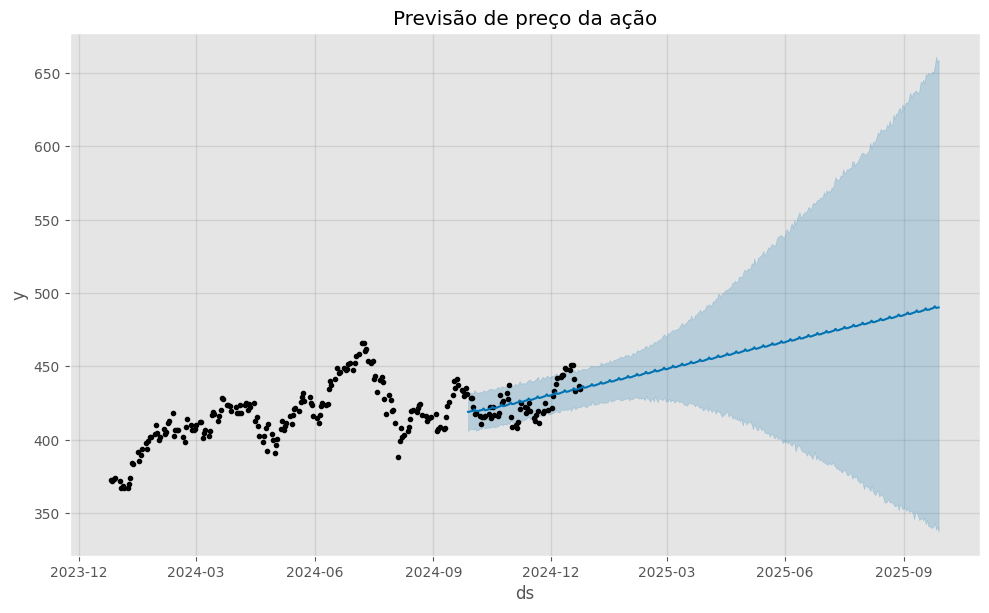

In [22]:
m.plot(previsoes)
plt.title('Previsão de preço da ação')
plt.show()

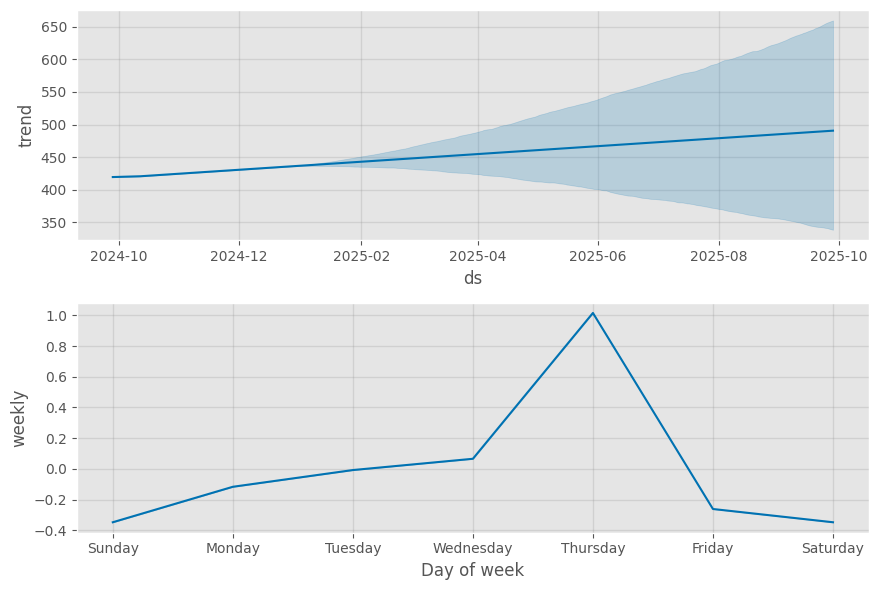

In [23]:
m.plot_components(previsoes)
plt.show()